# Supervised Learning: Shopping Intention

In this practical assignment, we will explore supervised learning, focusing on a classification problem. We'll apply different learning algorithms, compare their performance using evaluation metrics.

Key steps include:
1. Dataset analysis and pre-processing.
3. Defining training and test sets.
4. Selecting and parameterizing learning algorithms including Decision Trees, Neural Networks, K-NN, SVM, etc.
5. Evaluating the learning process on the test set.

We'll use pandas to pre-process the dataset, scikit-learn for implementing algorithms, and seaborn for visualization.

## Dataset

We'll use the [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) from the UCI Machine Learning Repository.

From the dataset description:
> The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

As presented in the slides, we will try to answer some questions:
* Will a particular session lead to a purchase?
* Which features are most/least indicative of a purchase?
* What users are more/less likely to purchase?


## Pre-processing

We'll start by loading the dataset `online_shoppers_intention.csv` using pandas.

In [1]:
import pandas

data = pandas.read_csv('online_shoppers_intention.csv')

# check if there are any null values
print("Any null values? ", data.isnull().values.any())

# check if there are any missing values
print("Any missing values? ", data.isna().values.any())

data.head()


Any null values?  False
Any missing values?  False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
data.describe()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Let's try to plot some of the features to get a better understanding of the dataset.

As previously mentioned, we'll use seaborn for visualization. We'll start with a simple correlation matrix.

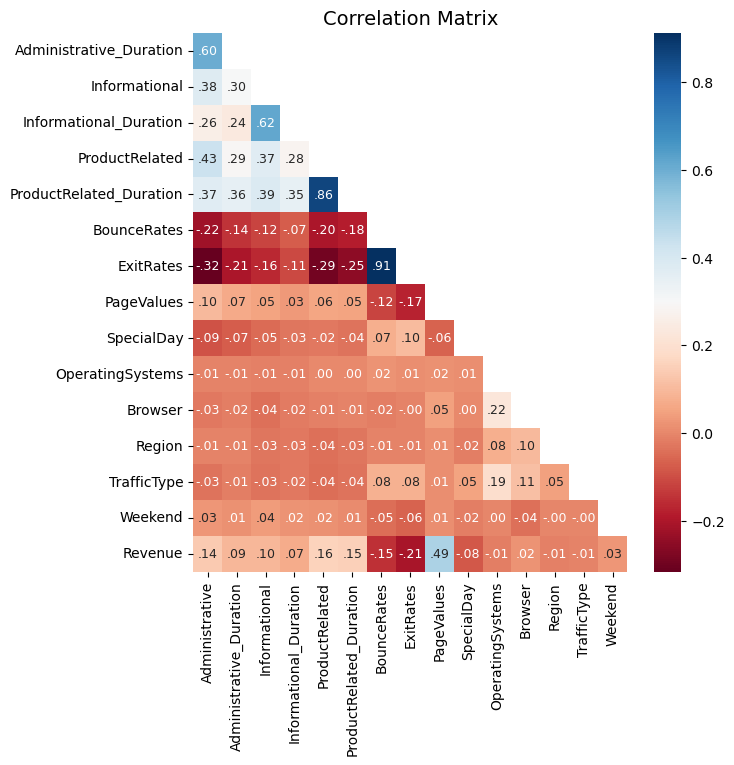

In [3]:
import seaborn
import numpy as np

%matplotlib inline


def plot_correlation_matrix(data):
    corr_matrix = data.corr(numeric_only=True)

    # drop first row and last column
    corr_matrix = corr_matrix.iloc[1:, :-1]

    # only show the lower triangle of the matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool),
                   k=1)  # k=1 to remove the diagonal

    # this is just to make the numbers more compact by removing the leading zeros
    annot = np.array([['' if m else f"{corr_matrix.iloc[i, j]:.2f}".lstrip('0').replace(
        '-0', '-') for j, m in enumerate(row)] for i, row in enumerate(mask)])

    hm = seaborn.heatmap(corr_matrix, mask=mask, cmap='RdBu',
                         annot=annot, fmt='', annot_kws={'size': 9})
    hm.figure.set_size_inches(7, 7)
    hm.set_title('Correlation Matrix', fontsize=14)


plot_correlation_matrix(data)


As we can see, `Revenue` is mostly correlated with `PageValues` and `ProductRelated` features, it is also very negatively correlated with `BounceRates` and `ExitRates`, which is to be expected.

In fact, we can see that `BounceRates` and `ExitRates` are highly correlated, so we can drop one of them. We'll drop `BounceRates` since it is more negatively correlated with `Revenue`.

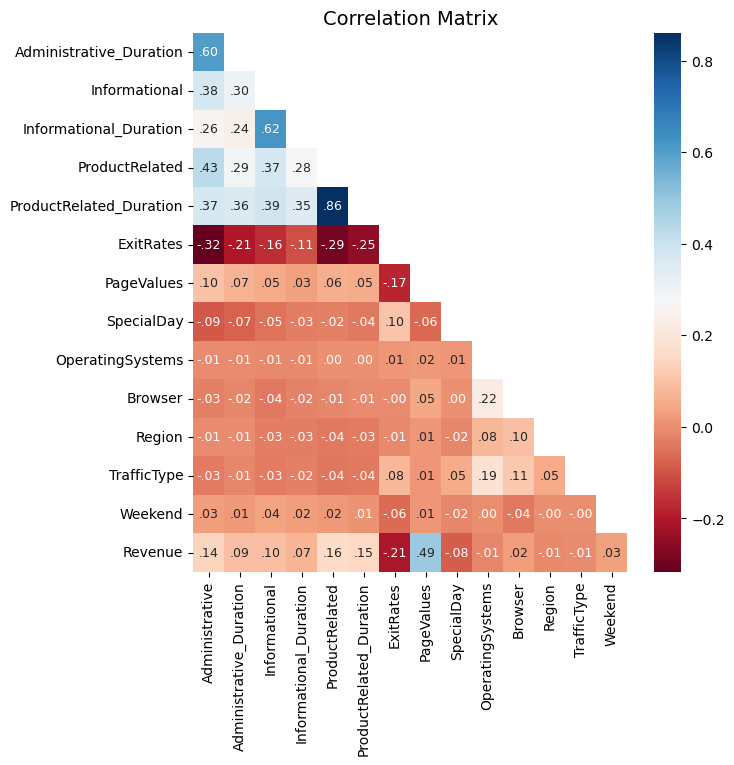

In [4]:
data_filtered = data.drop(columns=['BounceRates'])

# check correlation matrix again
plot_correlation_matrix(data_filtered)


Before we start training our models, we'll need to convert the categorical features to numerical values.

In [5]:
# check if there are any invalid month values
print(data_filtered['Month'].unique())

# convert `June` to `Jun` otherwise pandas will not be able to convert it to a numeric value
data_filtered['Month'] = data_filtered['Month'].replace('June', 'Jun')

# convert `Month` to a numeric value
data_filtered['Month'] = pandas.to_datetime(
    data_filtered['Month'], format='%b').dt.month
print('Month unique values: ', data_filtered['Month'].unique(), 'size: ', len(data_filtered['Month'].unique()))

# convert `VisitorType` to a numeric value
data_filtered['VisitorType'] = pandas.Categorical(
    data_filtered['VisitorType']).codes
print('VisitorType unique values: ', data_filtered['VisitorType'].unique())

# convert `Weekend` to a numeric value
data_filtered['Weekend'] = pandas.Categorical(
    data_filtered['Weekend']).codes
print('Weekend unique values: ', data_filtered['Weekend'].unique())


['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Month unique values:  [ 2  3  5 10  6  7  8 11  9 12] size:  10
VisitorType unique values:  [2 0 1]
Weekend unique values:  [0 1]


In [6]:
data_filtered['Revenue'].value_counts()

# After preprocessing, we have X(features) and y(target) variables
X = data_filtered.drop(columns=['Revenue'])
y = data_filtered['Revenue']


## Training and Test Sets

Now we will start training our models. We'll use `GridSearchCV` to find the best parameters for each algorithm. We'll use 10-fold cross-validation to evaluate the performance of each algorithm.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import f1_score


def grid_search(model: BaseEstimator, params, X, y):
    grid = GridSearchCV(model, params, cv=10, n_jobs=-1, verbose=1)

    print('Fitting ', model.__class__.__name__, '...')
    grid.fit(X, y)

    print("Best score: ", grid.best_score_)
    print("Best params: ", grid.best_params_)
    print("F1 score: ", f1_score(y_test, grid.predict(X_test)))
    print()

    return grid


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

# check the shape of X and y
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

# print('X_train head:')
# print(X_train.head())

# print('y_train head:')
# print(y_train.head())


X_train shape:  (9864, 16)
y_train shape:  (9864,)


In [8]:
from sklearn.tree import DecisionTreeClassifier


def train_desicion_tree(X_train, y_train):
    params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 2, 4, 6, 8, 10],
        # 'min_samples_split': [2, 4, 6, 8, 10],
        # 'min_samples_leaf': [1, 2, 3, 4, 5],
        'max_features': [None, 'sqrt', 'log2']
    }

    grid = grid_search(DecisionTreeClassifier(), params, X_train, y_train)
    return grid


K-Nearest Neighbors:

In [9]:
from sklearn.neighbors import KNeighborsClassifier


def train_knn(X_train, y_train):
    params = {
        'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
        'weights': ['uniform', 'distance'],
        # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        # 'leaf_size': [10, 20, 30],
        'p': [1, 2]
    }

    grid = grid_search(KNeighborsClassifier(), params, X_train, y_train)
    return grid


Support Vector Machines:

In [10]:
from sklearn.svm import SVC


def train_svm(X_train, y_train):
    params = {
        'C': [0.1, 1],
        # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        # 'degree': [1, 2, 3],
        # 'gamma': ['scale', 'auto']
    }

    grid = grid_search(SVC(), params, X_train, y_train)
    return grid


In [11]:
from sklearn.ensemble import RandomForestClassifier


def train_random_forest(X_train, y_train):
    params = {
        'n_estimators': [100, 200, 300],
        'criterion': ['gini', 'entropy'],
        # 'max_depth': [None, 2, 4, 6, 8, 10],
        # 'min_samples_split': [2, 4, 6, 8, 10],
        # 'min_samples_leaf': [1, 2, 3, 4, 5],
        'max_features': ['sqrt', 'log2']
    }

    grid = grid_search(RandomForestClassifier(), params, X_train, y_train)
    return grid


In [12]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

def train_gaussian_nb(X_train, y_train):
    params = {
        'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06],
    }

    grid = grid_search(GaussianNB(), params, X_train, y_train)
    return grid

In [13]:
# Neural Network
from sklearn.neural_network import MLPClassifier


def train_mlp(X_train, y_train):
    params = {
        'hidden_layer_sizes': [(100,), (200,), (300,), (400,), (500,), (600,)],
        # 'activation': ['identity', 'logistic', 'tanh', 'relu'],
        # 'solver': ['sgd'],
        # 'alpha': [0.0001, 0.001, 0.01, 0.1],
        # 'learning_rate': ['adaptive'],
        'max_iter': [400, 500, 600, 700]
    }

    grid = grid_search(MLPClassifier(), params, X_train, y_train)

    return grid


In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


def plot_confusion_matrix(grid: GridSearchCV, X, y):
    y_pred = grid.predict(X)
    cm = confusion_matrix(y, y_pred)
    # cm = ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=grid.classes_)
    # set title

    # Calculate the percentages of each count in the confusion matrix
    cm_percentages = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_percentages = np.round(cm_percentages * 100, 2)

    # Combine the count and percentage in a single matrix
    cm_combined = np.empty((cm.shape[0], cm.shape[1]), dtype=object)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            cm_combined[i, j] = f"{cm[i, j]}\n({cm_percentages[i, j]}%)"

    # plot the confusion matrix
    plt.figure(figsize=(10, 7))
    seaborn.heatmap(cm, annot=cm_combined, xticklabels=grid.classes_,
                    yticklabels=grid.classes_, cmap='Blues', fmt='')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{grid.best_estimator_.__class__.__name__}\nConfusion Matrix')
    plt.show()


Fitting  KNeighborsClassifier ...
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best score:  0.8651647893199833
Best params:  {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
F1 score:  0.38112522686025413



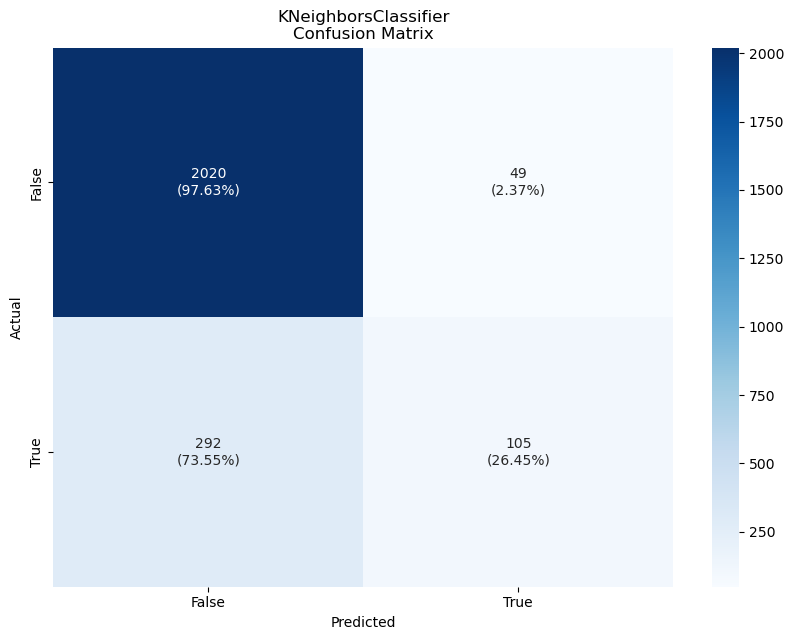

Fitting  RandomForestClassifier ...
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best score:  0.9057180465729946
Best params:  {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 300}
F1 score:  0.6340782122905028



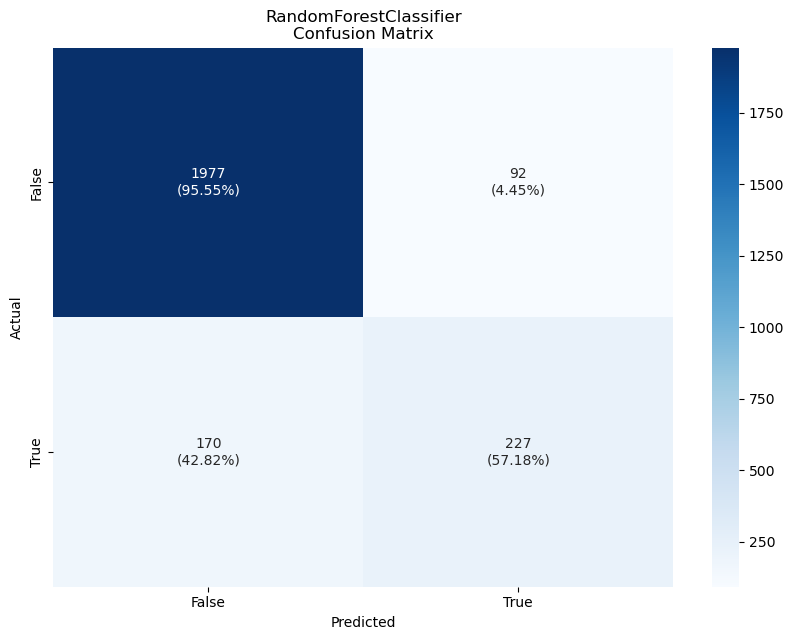

In [13]:
knn_grid = train_knn(X_train, y_train)
plot_confusion_matrix(knn_grid, X_test, y_test)

svm_grid = train_svm(X_train, y_train)
plot_confusion_matrix(svm_grid, X_test, y_test)

random_forest_grid = train_random_forest(X_train, y_train)
plot_confusion_matrix(random_forest_grid, X_test, y_test)


### Downsample Negative Class

Not looking good. The models are good at predicting the negative class (SVM even has a perfect score!), but not so good at predicting the positive class. This is probably due to the class imbalance in the dataset.

Let's try to fix this by downsampling the negative class.

In [15]:
from sklearn.utils import resample

# downsample the majority class
X_majority = X[y == False]
X_minority = X[y == True]

X_majority_downsampled = resample(
    X_majority, replace=False, n_samples=X_minority.shape[0], random_state=0)

X_downsampled = pandas.concat([X_majority_downsampled, X_minority])
y_downsampled = y[X_downsampled.index]

# check if the classes are balanced
print(y_downsampled.value_counts())

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_downsampled, y_downsampled, test_size=0.2, random_state=0)

# check the shape of X and y
print(X_train.shape)
print(y_train.shape)


False    1908
True     1908
Name: Revenue, dtype: int64
(3052, 16)
(3052,)


Now let's try to train the models again.

Fitting  DecisionTreeClassifier ...
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best score:  0.8476545590913961
Best params:  {'criterion': 'gini', 'max_depth': 2, 'max_features': None}
F1 score:  0.8198074277854195



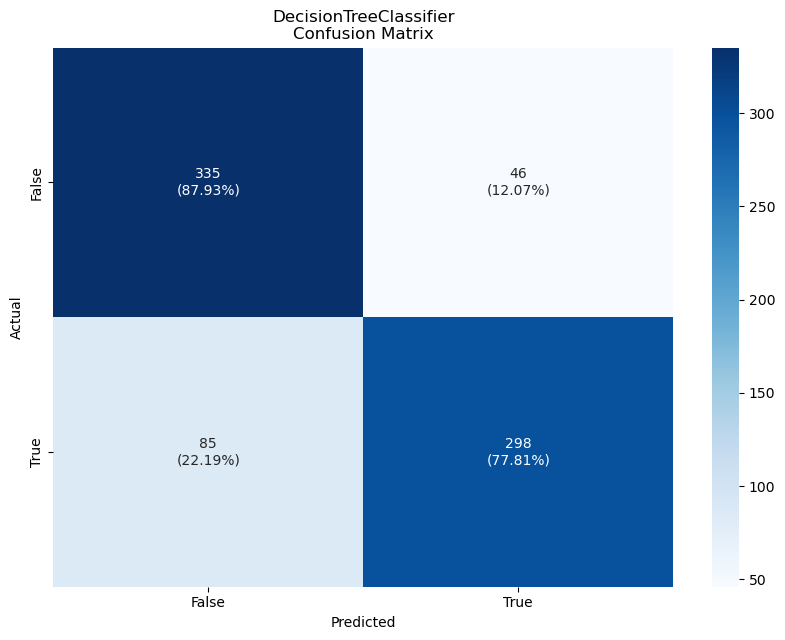

In [15]:
desicion_tree_grid = train_desicion_tree(X_train, y_train)
plot_confusion_matrix(desicion_tree_grid, X_test, y_test)


Fitting  KNeighborsClassifier ...
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best score:  0.7365734490517519
Best params:  {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
F1 score:  0.7191601049868767



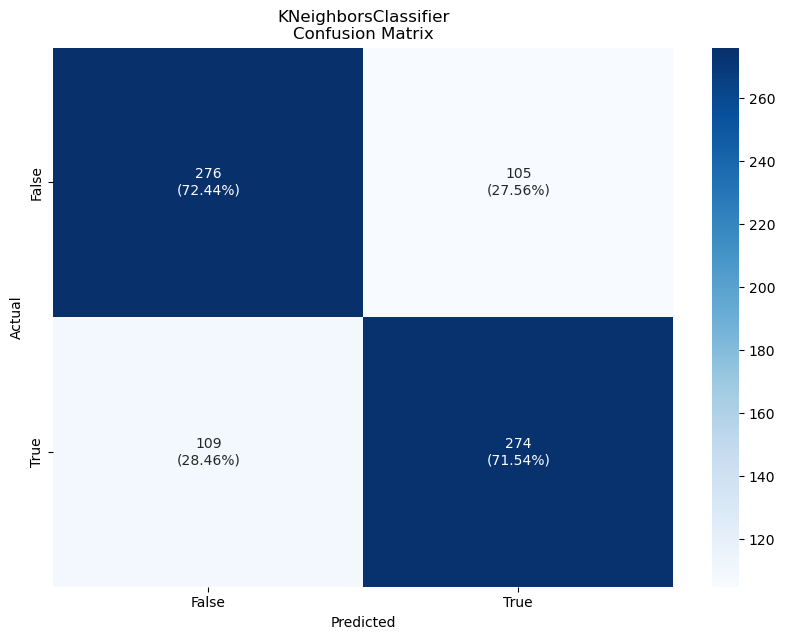

In [16]:
knn_grid = train_knn(X_train, y_train)
plot_confusion_matrix(knn_grid, X_test, y_test)

In [ ]:
svm_grid = train_svm(X_train, y_train)
plot_confusion_matrix(svm_grid, X_test, y_test)

Fitting  RandomForestClassifier ...
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best score:  0.8499528554591235
Best params:  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 200}
F1 score:  0.8389610389610389



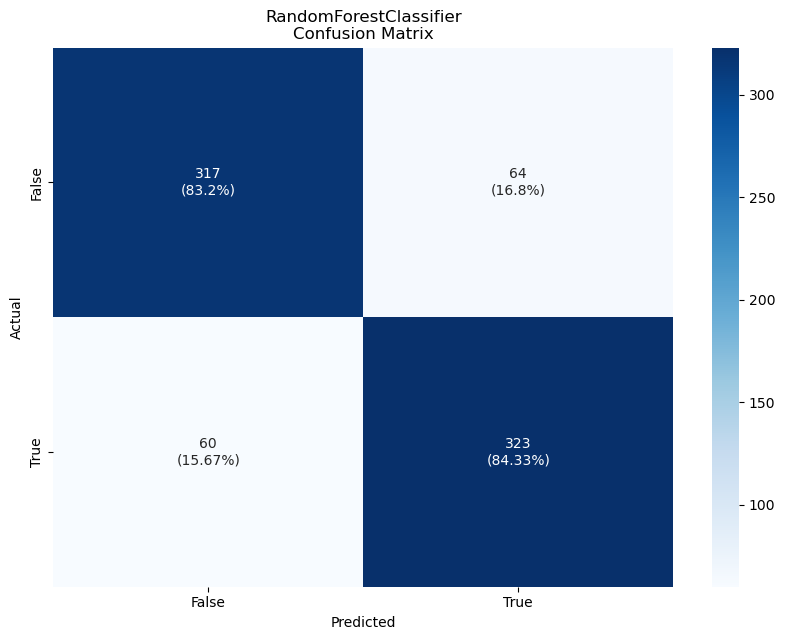

In [16]:
random_forest_grid = train_random_forest(X_train, y_train)
plot_confusion_matrix(random_forest_grid, X_test, y_test)

Fitting  MLPClassifier ...
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best score:  0.7834383370834672
Best params:  {'hidden_layer_sizes': (400,), 'max_iter': 400}
F1 score:  0.6525285481239804



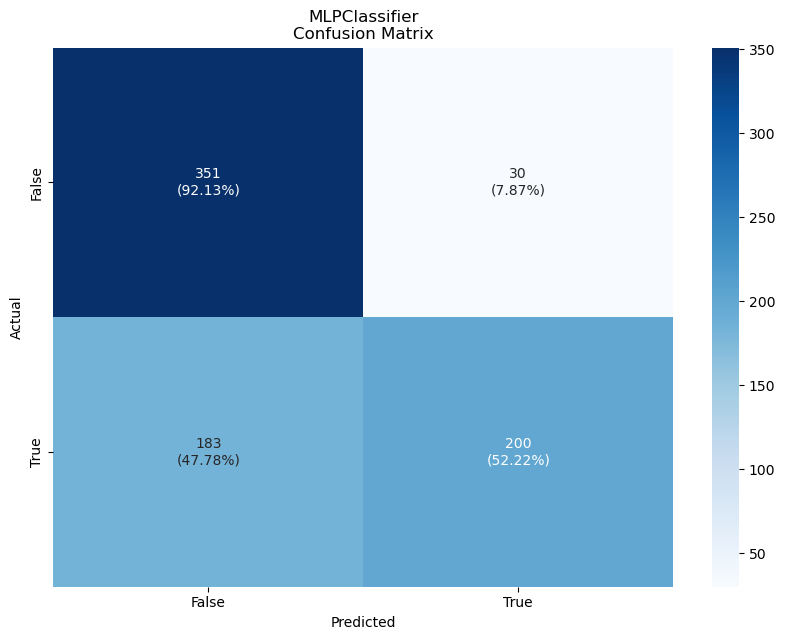

In [54]:
mlp_grid = train_mlp(X_train, y_train)
plot_confusion_matrix(mlp_grid, X_test, y_test)

Fitting  GaussianNB ...
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best score:  0.7355962712954034
Best params:  {'var_smoothing': 1e-09}
F1 score:  0.690856313497823



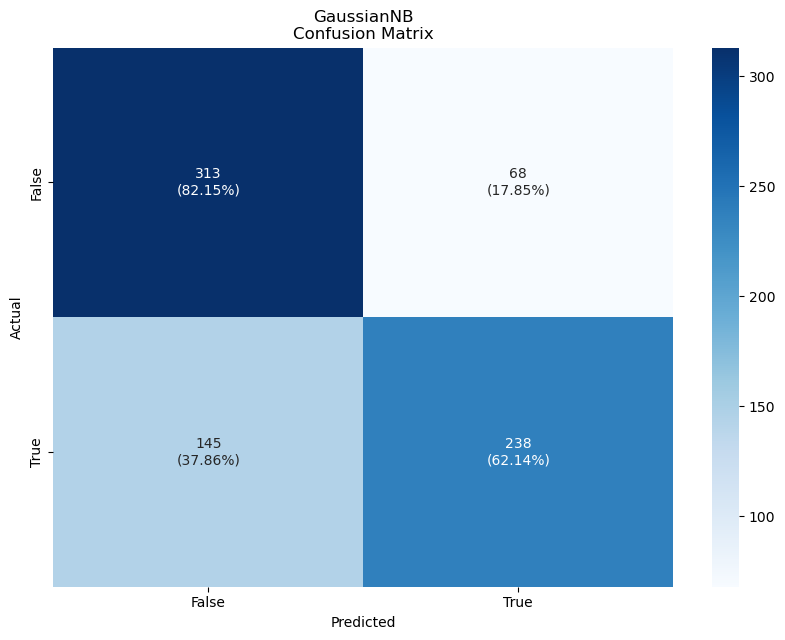

In [56]:
gaussian_nb_grid = train_gaussian_nb(X_train, y_train)
plot_confusion_matrix(gaussian_nb_grid, X_test, y_test)

As we can see, there was a significant improvement in the performance of the models.

Random Decision Forests seem to be the best model for this dataset, with a F1-score of `0.84` (on the downsampled test set).

## Loss

To quote *Artificial Intelligence: A Modern Approach*:
> It is worse to classify non-spam as spam (and thus potentially miss an important message) than to classify spam as non-spam (and thus suffer a few seconds of annoyance).

In our case, it is worse to classify a session that **will** lead to a purchase as a session that **will not** than to classify a session that **will not** lead to a purchase as a session that **will**.

On the matrixes above, we want the bottom-left cell (classifying buyers as non-buyers) to be as small as possible, more so than the top-right cell.

## Random Forests

Since Random Forests seem to be the most promising model, let's try to understand it better.

From wikipedia:
> Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

In a simplified way, Random Forests are a collection of Decision Trees, where each tree is trained on a random subset of the training data, and a random subset of the features.

### Bagging

The first part of the algorithm is called Bagging (or Bootstrap Aggregating). It is a method that involves choosing random subsets of the training data, with replacement. This means that some samples may be selected multiple times, while others may not be selected at all.

Doing this for many decision trees, we get a collection of trees that are trained on different subsets of the training data where there are biases for different types of samples. For example, some trees may be trained on more `Revenue: True` samples, while others may be trained on more `Revenue: False` samples. This is good because we want our model to be able to predict both classes equally well.

### Random Subspace Method

The second part of the algorithm is called Random Subspace Method. It's similar to Bagging, but instead of choosing random subsets of the training data, we choose a random subset of the features. 

Again, this means that some trees may be biased, now towards different features instead of different sample characteristics. For example, some trees may be trained with `Administrative` and `Informational` features and thus be able to predict `Revenue` more accuratly for samples with high values for these features. This means that the model will be able to predict `Revenue` for samples with different characteristics, which is a good thing to do since there are many factors that influence whether a session will lead to a purchase or not (if there weren't, we could just use regular Decision Trees).

### Output

For classification tasks, the output of the random forest is simply the class selected by most trees.

The idea is that when we account for the predictions of all the different trees the biases will *"cancel out"* and thus, the model will be able to predict both classes equally well, as well recognize the importance of differently correlated features for different samples, and ultimately have a better performance than a single Decision Tree.

This kind of model is called an **ensemble model** because it is a collection of models that are combined to produce a final prediction.


<Axes: >

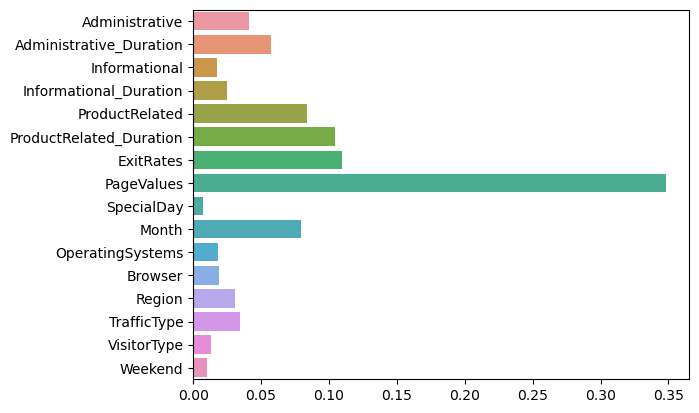

In [17]:
# let's plot the feature importances of the best random forest model

feature_importances = pandas.Series(random_forest_grid.best_estimator_.feature_importances_, index=X.columns)
seaborn.barplot(x=feature_importances, y=feature_importances.index)

### Page Values

From the bar plot, we can see that `PageValues` has the highest importance for the model, which is not surprising since as we saw earlier, it is the most correlated feature with `Revenue`. But what are Page Values anyway?

If we search for `page value`, we get an article from [Google Analytics](https://support.google.com/analytics/answer/2695658) that briefly explains it:

> Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your site's revenue.

Well, that explains it. If a user visits a page with a high `PageValue` it is not surprising that they are much more likely to make a purchase.

In a commercial setting, this information can be used to improve the website. For example, if we know that a particular page has a high `PageValue`, we can try to understand why and see if we can apply the same principles to other pages in order to increase the `PageValue` of those pages, which means that more users are becoming interested and engaged in the website, and thus more likely to make a purchase.

## Remarks

### On Neural Networks

As stated in *Artificial Intelligence: A Modern Approach*:
> Random forests have been very successful across a wide variety of application problems. In Kaggle data science competitions they were the most popular approach of winning teams from 2011 through 2014, and remain a common approach to this day (although deep learning and gradient boosting have become even more common among recent winners)

In our opinion, this is not only due to the fact that hardware has become more powerful and cheaper but also the very large amount of data that is available nowadays. Neural Networks and Deep Learning methods are very good at learning from large amounts of data, and the more data we have, the better they perform, this is why it took some time for them to become popular and successful.

Here we have a dataset with about 12,000 samples, which may seem like quite a lot, but it is not nearly enough to train a good Neural Network, specially considering that we have 17 features and a very unbalanced dataset in terms of `Revenue`. On the other hand, Random Forests are very good at learning from small datasets, so it is not surprising that they performed better than other algorithms.

### On the Dataset

As we were working on this assignment, we came to realize that predicting whether a session will lead to a purchase or not is not an easy nor straightforward task, there are just too many factors that influence the outcome and the accuracy of the prediction will heavily depend on the amount of data that we have available, not only in terms of number of samples but also in terms of number of features.

Sure, Random Forests got a decent F1-score and predicted the outcome of the sessions with a good accuracy, but we can't really say that for all future new data, the model will be able to predict the outcome with the same accuracy.

This is not to say the dataset is bad, it is just that in this kind of problem, we need a lot of data to be able to make good predictions, and not only that, we need to update the model with new data becoause we can't neglect the fact that the business is constantly changing and evolving, and so are the users.

A model that is trained on data from 2010 will most likely perform **very** poorly on data from 2020. This is just an inherent characteristic of machine learning models, they need to be updated with new data in order to keep up with the changing world, which is specially true in the business and e-commerce world because there are not many constants, no definitive formulas, it revolves around the users and society as a whole. For example, in 2010 social media was not nearly as popular as it is today, so at the time, it was not as important to have a good social media presence as it is today. 

This is going beyond the scope of this assignment, we just wanted to point out that this is a very broad and complex problem, and that the dataset is not the only factor that influences the performance of the models.